Random Forest and SVM Prediction

In [2]:
import numpy as np 
import pandas as pd
df =pd.read_csv("6_aug-Sheet1.csv")
from sklearn import svm
import pickle
df.head()

,id,date,time,temp,humidity,pressure,light_intensity
0,1,06/08/22,17:06:11,30.6,71,698.29,35.83
1,2,06/08/22,17:07:16,30.6,71,698.11,35.00
2,3,06/08/22,17:08:21,30.2,72,697.85,35.00
3,4,06/08/22,17:09:02,29.6,72,697.50,35.00
4,5,06/08/22,17:10:06,30.0,72,697.50,35.00


In [3]:
df.columns
df.shape
df.isna().any()

id                 False
date               False
time               False
temp               False
humidity           False
pressure           False
light_intensity    False
dtype: bool

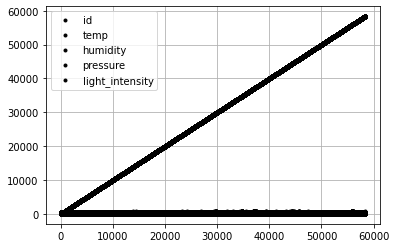

In [4]:
from pandas import Series
from matplotlib import pyplot
series = pd.read_csv('6_aug-Sheet1.csv', header=0)
series.plot(style='k.',legend = True,grid = True)
pyplot.show()

In [5]:
df['date'] = pd.to_datetime(df['date']).dt.date
#df['time'] = pd.to_datetime(df['time']).dt.time
#df['time1'] = pd.to_datetime(df['time'],format= '%H:%M:%S' ).dt.time


In [6]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
df['H'] = pd.to_datetime(df['time']).dt.hour
df['M'] = pd.to_datetime(df['time']).dt.minute
df['S'] = pd.to_datetime(df['time']).dt.second
df.drop('date',axis = 1, inplace = True)
#df.drop('time',axis = 1, inplace = True)
#Changing column positions
df = df[['year','month','day','H','M','S','temp','humidity','pressure','light_intensity']]
#df.replace([np.NaN, np.inf,-np.inf], 0, inplace=True)

In [7]:
target = np.array(df[['temp','humidity','pressure','light_intensity']])
df.drop('temp', axis = 1, inplace = True)
df.drop('humidity', axis = 1, inplace = True)
df.drop('pressure', axis = 1, inplace = True)
df.drop('light_intensity', axis = 1, inplace = True)

In [8]:
feature_list = list(target)
features = np.array(df)
#print(df)
print(features)

[[2022    6    8   17    6   11]
 [2022    6    8   17    7   16]
 [2022    6    8   17    8   21]
 ...
 [2022    9   30   12    0    5]
 [2022    9   30   12    1   13]
 [2022    9   30   12    2   23]]


In [9]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.4,random_state = 27)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (35032, 6)
Training Labels Shape: (35032, 4)
Testing Features Shape: (23355, 6)
Testing Labels Shape: (23355, 4)


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 2000)
# Train the model on training data
rf.fit(train_features, train_labels)


RandomForestRegressor(n_estimators=2000)

In [26]:
train_labels.shape

(35032, 4)

In [43]:
train_label_shape = train_labels.reshape(-1)
print(train_label_shape.shape)
print(train_labels.shape)
train_features_shape = train_features.reshape(-1)
print(train_features_shape.shape)
print(train_features.shape)




(140128,)
(35032, 4)
(210192,)
(35032, 6)


In [12]:
import pickle

In [13]:
with open("classifier/trained__model.clf","wb") as f:
    pickle.dump(rf, f)

In [14]:
import pickle
with open("classifier/trained__model.clf", 'rb') as f:
    clf = pickle.load(f)

In [15]:
predictions = clf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.88


In [16]:
df[['temp_P','humidity_P','pressure_P','light_intensity_P']] = clf.predict(features)
df.head()

,year,month,day,H,M,S,temp_P,humidity_P,pressure_P,light_intensity_P
0,2022,6,8,17,6,11,30.46690,71.2195,698.086250,35.711565
1,2022,6,8,17,7,16,30.51130,71.2015,698.042300,35.403185
2,2022,6,8,17,8,21,30.25185,71.8635,697.824300,35.504210
3,2022,6,8,17,9,2,29.83675,71.9405,697.530155,35.609595
4,2022,6,8,17,10,6,29.77590,72.0225,697.428790,35.840585


In [17]:
from sklearn.metrics import r2_score
accuracy = r2_score(predictions,test_labels)
print('THE TOTAL ACCURACY IS',accuracy*100)

THE TOTAL ACCURACY IS 91.8077897018772


In [ ]:

df.corr()

,year,month,day,H,M,S,temp_,humidity_,pressure_,light_intensity_
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.022367,-0.061252,-0.000759,0.001303,-0.120276,0.064735,-0.099088,-0.021158
day,NaN,0.022367,1.000000,-0.034758,-0.001883,0.001602,-0.135801,-0.049897,-0.147578,0.091786
H,NaN,-0.061252,-0.034758,1.000000,0.000691,-0.002589,0.514155,0.468638,0.510130,0.324879
M,NaN,-0.000759,-0.001883,0.000691,1.000000,0.002816,-0.002577,-0.000278,0.000636,0.003418
S,NaN,0.001303,0.001602,-0.002589,0.002816,1.000000,-0.002183,-0.002286,-0.001446,-0.003035
temp_,NaN,-0.120276,-0.135801,0.514155,-0.002577,-0.002183,1.000000,0.695662,0.895950,0.212490
humidity_,NaN,0.064735,-0.049897,0.468638,-0.000278,-0.002286,0.695662,1.000000,0.561180,0.419788
pressure_,NaN,-0.099088,-0.147578,0.510130,0.000636,-0.001446,0.895950,0.561180,1.000000,0.204789
light_intensity_,NaN,-0.021158,0.091786,0.324879,0.003418,-0.003035,0.212490,0.419788,0.204789,1.000000


In [20]:
a = np.array([2023,2,9,10,50,00])
clf.predict(a.reshape(1,6))

array([[ 30.1387 ,  71.891  , 700.89102, 114.05645]])